In [21]:
# Import Libaries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data and Stats

In [6]:
# Import Data
df = pd.read_csv('insurance.csv')

In [7]:
# Get Stats
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe

<bound method NDFrame.describe of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

# Data Visualization and EDA

## Is there a relationship between Expenses and BMI?

<function matplotlib.pyplot.show(close=None, block=None)>

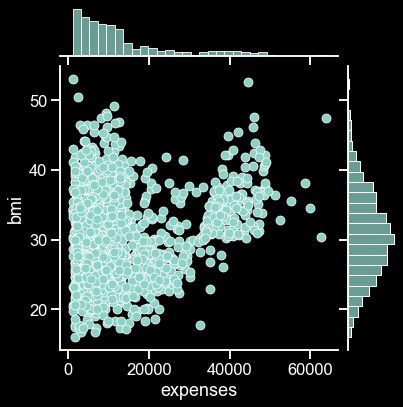

In [28]:
# Set plot style
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Expenses vs BMI
sns.jointplot(x=df['expenses'], y=df['bmi'], kind='scatter', palette="pastel")
plt.show

## Is there a relationship between Sex and Expenses?

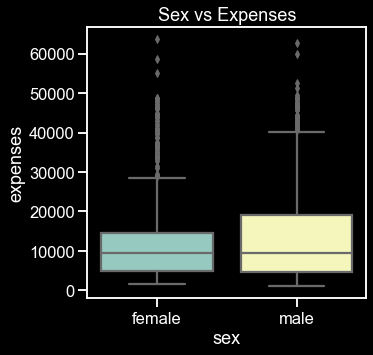

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(x='sex', y='expenses', data = df).set(title='Sex vs Expenses');

## Is there a relationship between Expenses and if the person is a smoker or not?

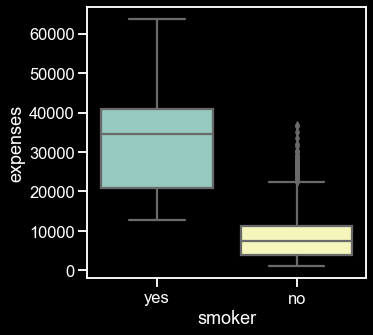

In [35]:
plt.figure(figsize = (5,5))
sns.boxplot(x='smoker', y='expenses', data = df);

## What is the distribution of the smoker group?

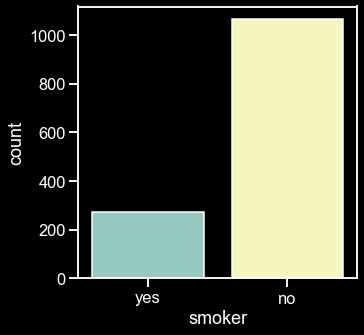

In [38]:
plt.figure(figsize = (5,5))
sns.countplot(x='smoker', data = df);

## Is there a relationship between expenses and age?

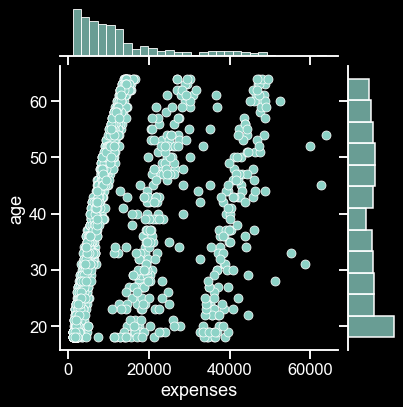

In [39]:
sns.jointplot(x=df['expenses'], y=df['age'], kind='scatter');

# Data Cleaning & Feature Engineering

In [48]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [49]:
# Convert Sex to floats
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(float)

In [50]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1.0,27.9,0,yes,southwest,16884.92
1,18,0.0,33.8,1,no,southeast,1725.55
2,28,0.0,33.0,3,no,southeast,4449.46
3,33,0.0,22.7,0,no,northwest,21984.47
4,32,0.0,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0.0,31.0,3,no,northwest,10600.55
1334,18,1.0,31.9,0,no,northeast,2205.98
1335,18,1.0,36.9,0,no,southeast,1629.83
1336,21,1.0,25.8,0,no,southwest,2007.95


In [51]:
# Convert Smoker to floats
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1}).astype(float)

In [55]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [56]:
# Convert Region to floats
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 4}).astype(float)

In [57]:
# Check values
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1.0,27.9,0,1.0,0.0,16884.92
1,18,0.0,33.8,1,0.0,1.0,1725.55
2,28,0.0,33.0,3,0.0,1.0,4449.46
3,33,0.0,22.7,0,0.0,2.0,21984.47
4,32,0.0,28.9,0,0.0,2.0,3866.86
...,...,...,...,...,...,...,...
1333,50,0.0,31.0,3,0.0,2.0,10600.55
1334,18,1.0,31.9,0,0.0,4.0,2205.98
1335,18,1.0,36.9,0,0.0,1.0,1629.83
1336,21,1.0,25.8,0,0.0,0.0,2007.95


In [58]:
# Add a column - bmi/age ratio
df['bmi/age ratio'] = df['bmi'] / df['age']

In [59]:
df

,age,sex,bmi,children,smoker,region,expenses,bmi/age ratio
0,19,1.0,27.9,0,1.0,0.0,16884.92,1.468421
1,18,0.0,33.8,1,0.0,1.0,1725.55,1.877778
2,28,0.0,33.0,3,0.0,1.0,4449.46,1.178571
3,33,0.0,22.7,0,0.0,2.0,21984.47,0.687879
4,32,0.0,28.9,0,0.0,2.0,3866.86,0.903125
...,...,...,...,...,...,...,...,...
1333,50,0.0,31.0,3,0.0,2.0,10600.55,0.620000
1334,18,1.0,31.9,0,0.0,4.0,2205.98,1.772222
1335,18,1.0,36.9,0,0.0,1.0,1629.83,2.050000
1336,21,1.0,25.8,0,0.0,0.0,2007.95,1.228571


# Modeling - Gradient Boosting Regressor

In [40]:
# Import Libraries
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [60]:
diabetes = datasets.load_diabetes()
X, y = df.drop(columns='expenses'), df.expenses

Next, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the regression model parameters.

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options (see GradientBoostingRegressor ).

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [71]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

rmse = mean_squared_error(y_test, reg.predict(X_test),squared=False)
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The root mean squared error (RMSE) on test set: 4317.6441
The mean squared error (MSE) on test set: 18642050.7705


## This model performed better with an RSME score of 4317 than the top rated AutoAI Model with an RSME score of 4444. Both models used the Gradient Boosting Regressor.

## Training Deviance

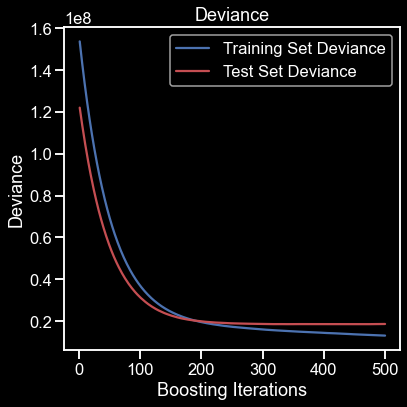

In [72]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Feature Importance

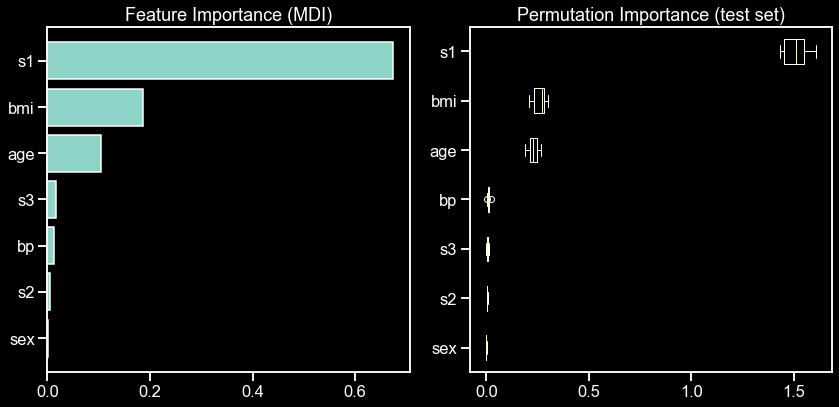

In [73]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()